In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
# Read CSV, parse dates, set index
df = pd.read_csv((r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 10\3\08-Stu_Rolled_Gold\Resources\gold_cad.csv'),
                 parse_dates=True,
                 index_col='Date')

df.head()

,Open,High,Low,Close
Date,,,,
2001-01-02,400.90,400.90,400.90,400.90
2001-01-03,401.68,401.68,401.68,401.68
2001-01-04,400.51,400.51,400.51,400.51
2001-01-05,401.92,401.92,401.92,401.92
2001-01-08,400.42,400.42,400.42,400.42


In [3]:
# Calculate return and lagged return
df["Return"] = df["Close"].pct_change()*100
df["Lagged_Return"] = df["Return"].shift()

df.head()

,Open,High,Low,Close,Return,Lagged_Return
Date,,,,,,
2001-01-02,400.90,400.90,400.90,400.90,NaN,NaN
2001-01-03,401.68,401.68,401.68,401.68,0.194562,NaN
2001-01-04,400.51,400.51,400.51,400.51,-0.291277,0.194562
2001-01-05,401.92,401.92,401.92,401.92,0.352051,-0.291277
2001-01-08,400.42,400.42,400.42,400.42,-0.373209,0.352051


In [4]:
# Clean df
df = df.dropna()
df.head()

,Open,High,Low,Close,Return,Lagged_Return
Date,,,,,,
2001-01-04,400.51,400.51,400.51,400.51,-0.291277,0.194562
2001-01-05,401.92,401.92,401.92,401.92,0.352051,-0.291277
2001-01-08,400.42,400.42,400.42,400.42,-0.373209,0.352051
2001-01-09,399.73,399.73,399.73,399.73,-0.172319,-0.373209
2001-01-10,395.55,395.55,395.55,395.55,-1.045706,-0.172319


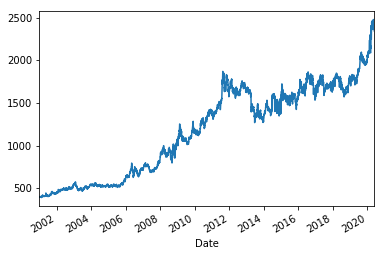

In [5]:
# Plot closing price
df["Close"].plot()

# Train Test Split Predictions

Training Period: 2001-2018
Testing Period: 2019

In [6]:
# Create a train/test split for the data using 2001-2018 for training and 2019 for testing
train_period = df.loc["2001":"2018"]
test_period = df.loc["2019"]

In [7]:
# Create train and test sets for dependent and independent variables
X_train = train_period["Lagged_Return"].to_frame()
X_test = test_period["Lagged_Return"].to_frame()
y_train = train_period["Return"]
y_test = test_period["Return"]

In [8]:
# Create and fit model to the data, make predictions
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Create and fit model to the data, make predictions
predictions = model.predict(X_test)

In [10]:
Results = y_test.to_frame()
Results["Predictions_Return"] = predictions

Results.head()

,Return,Predictions_Return
Date,,
2019-01-01,-3.522136,0.061023
2019-01-02,3.387913,0.544240
2019-01-03,0.157490,-0.428728
2019-01-04,-1.505112,0.026131
2019-01-07,-0.258793,0.260234


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FA00252C8>,
      dtype=object)

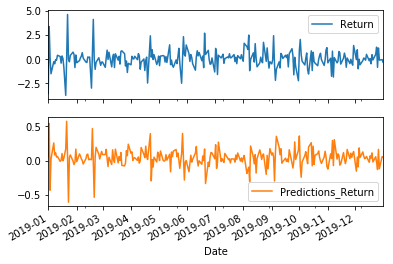

In [11]:
# Plot the out-of-sample results for 2019
Results.plot(subplots=True)

In [12]:
# Calculate out-of-sample mean_squared_error (for comparison to out-of-sample)
out_of_sample_mse = mean_squared_error(Results["Return"],
                                       Results["Predictions_Return"])

print(f"MSE is {out_of_sample_mse}")
# Calculate out-of-sample root mean_squared_error (for comparison to out-of-sample)
out_of_sample_rmse = np.sqrt(out_of_sample_mse)

print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

MSE is 0.9239739241945416
Out-of-sample Root Mean Squared Error (RMSE): 0.9612356236607867


---

# Rolling Out-of-Sample Predictions

In [13]:
df.head()

,Open,High,Low,Close,Return,Lagged_Return
Date,,,,,,
2001-01-04,400.51,400.51,400.51,400.51,-0.291277,0.194562
2001-01-05,401.92,401.92,401.92,401.92,0.352051,-0.291277
2001-01-08,400.42,400.42,400.42,400.42,-0.373209,0.352051
2001-01-09,399.73,399.73,399.73,399.73,-0.172319,-0.373209
2001-01-10,395.55,395.55,395.55,395.55,-1.045706,-0.172319


In [14]:
# Split the index into weekly periods
weeks = df.index.to_period("W").unique()
print(weeks[0])
print()
print(f"Total no. of weeks is {len(weeks)}.")

2001-01-01/2001-01-07

Total no. of weeks is 1014.


In [15]:
# Declare the training window of 12 weeks. Define the timeframe of rolling windows
training_window = 12
print(f"Training window: {training_window}")
len_weeks = len(weeks)
print()
print(f"No of weeks: {len_weeks}")

timeframe = len_weeks - training_window - 1
print()
print(f"Timeframe: {len_weeks} - {training_window} - 1 = {timeframe}")
print()

# Start of training window
start_of_training_period = weeks[0].start_time.strftime(format="%Y-%m-%d")

# End of training window
end_of_training_period = weeks[training_window + 0].end_time.strftime(format="%Y-%m-%d")

print(f"Start_train: {start_of_training_period}")
print(f"End_train: {end_of_training_period}")


# Start of testing window
test_week = weeks[training_window + 1:-1]

start_of_testing_period = test_week.start_time[0].strftime("%Y-%m-%d")

# End of testing window
end_of_testing_period = test_week.end_time[-1].strftime("%Y-%m-%d")

print()
print(f"Test week: {test_week}")
print()
print(f"Start_test: {start_of_testing_period}")
print(f"End_test: {end_of_testing_period}")

Training window: 12

No of weeks: 1014

Timeframe: 1014 - 12 - 1 = 1001

Start_train: 2001-01-01
End_train: 2001-04-01

Test week: PeriodIndex(['2001-04-02/2001-04-08', '2001-04-09/2001-04-15',
             '2001-04-16/2001-04-22', '2001-04-23/2001-04-29',
             '2001-04-30/2001-05-06', '2001-05-07/2001-05-13',
             '2001-05-14/2001-05-20', '2001-05-21/2001-05-27',
             '2001-05-28/2001-06-03', '2001-06-04/2001-06-10',
             ...
             '2020-03-23/2020-03-29', '2020-03-30/2020-04-05',
             '2020-04-06/2020-04-12', '2020-04-13/2020-04-19',
             '2020-04-20/2020-04-26', '2020-04-27/2020-05-03',
             '2020-05-04/2020-05-10', '2020-05-11/2020-05-17',
             '2020-05-18/2020-05-24', '2020-05-25/2020-05-31'],
            dtype='period[W-SUN]', name='Date', length=1000, freq='W-SUN')

Start_test: 2001-04-02
End_test: 2020-05-31


In [16]:
# Training data with just one window
train = df[start_of_training_period:end_of_training_period]
train.tail()

,Open,High,Low,Close,Return,Lagged_Return
Date,,,,,,
2001-03-26,407.82,407.82,407.82,407.82,-0.329936,-0.285129
2001-03-27,409.28,409.28,409.28,409.28,0.358001,-0.329936
2001-03-28,406.35,406.35,406.35,406.35,-0.715891,0.358001
2001-03-29,408.72,409.82,406.36,407.30,0.233789,-0.715891
2001-03-30,408.01,408.80,404.54,406.59,-0.174319,0.233789


In [17]:
test = df[start_of_testing_period:end_of_testing_period]
test.tail()

,Open,High,Low,Close,Return,Lagged_Return
Date,,,,,,
2020-05-25,2420.35,2421.47,2404.55,2415.38,-0.308726,-0.279464
2020-05-26,2415.60,2419.18,2371.78,2381.42,-1.405990,-0.308726
2020-05-27,2370.87,2377.75,2339.93,2374.59,-0.286804,-1.405990
2020-05-28,2374.07,2399.81,2367.19,2378.61,0.169292,-0.286804
2020-05-29,2385.98,2416.00,2375.79,2412.15,1.410067,0.169292


In [18]:
# Construct empty placeholder dataframes. During each iteration of the loop, we'll append that week"s predictions to this DataFrame.
all_predictions = pd.DataFrame(columns=["Out-of-sample predictions"])
all_actuals = pd.DataFrame(columns=["Actual Returns"])

all_actuals

,Actual Returns


In [19]:
# During rolling iteration, split into train and test sets. Use linear regression to make out-of-sample predictions. Append the results to external dataframes.
for i in range(0, timeframe):
    
    # Start of training period
    start_of_training_period = weeks[i].start_time.strftime(format="%Y-%m-%d")
    
    # End of training period
    end_of_training_period = weeks[training_window + i].end_time.strftime(format="%Y-%m-%d")
    
    # Window for test data
    test_week = weeks[training_window + i + 1]
    
    # Start date for testing period
    start_of_test_period = test_week.start_time.strftime(format="%Y-%m-%d")
    end_of_test_period = test_week.end_time.strftime(format="%Y-%m-%d")
    
    train = df[start_of_training_period:end_of_training_period]
    test = df[start_of_test_period:end_of_test_period]
    
    # Create new DataFrames:
    X_train = train["Lagged_Return"].to_frame()
    y_train = train["Return"]

    X_test = test["Lagged_Return"].to_frame()
    y_test = test["Return"]
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    
    # Enter data to dataframe
    predictions = pd.DataFrame(predictions,
                               index=X_test.index,
                               columns=["Out-of-sample predictions"])
    
    actuals = pd.DataFrame(y_test,
                           index=y_test.index)
                           #columns=["Actual Returns"])
        
    actuals.columns = ["Actual Returns"]  
        
    # Append to dataframe created outside the loop
    all_predictions = all_predictions.append(predictions)
    all_actuals = all_actuals.append(actuals)

In [20]:
# Concat actual returns with out-of-sample predictions
Results = pd.concat([all_actuals,
                     all_predictions],
                    axis=1)

Results.head()

,Actual Returns,Out-of-sample predictions
2001-04-02,-0.577978,0.023480
2001-04-03,0.168217,0.023246
2001-04-04,0.432184,0.023678
2001-04-05,-0.115573,0.023831
2001-04-06,0.152634,0.023514


In [31]:
# 2019 Data
Results_2019 = Results.loc["2019":]
Results_2019.tail()

,Actual Returns,Out-of-sample predictions
2020-05-27,-0.286804,0.187017
2020-05-28,0.169292,0.178567
2020-05-29,1.410067,0.175123
2020-06-01,-1.517733,0.232197
2020-06-02,-1.275499,0.214480


In [30]:
# 2019 Data
# Results_2019 = Results.loc["2019"]
# Results_2019.tail()

,Actual Returns,Out-of-sample predictions
2019-12-25,-0.840660,-0.194821
2019-12-26,1.160024,0.038846
2019-12-27,-0.091898,-0.185164
2019-12-30,-0.038992,0.000419
2019-12-31,-0.311561,-0.007285


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FA249A888>,
      dtype=object)

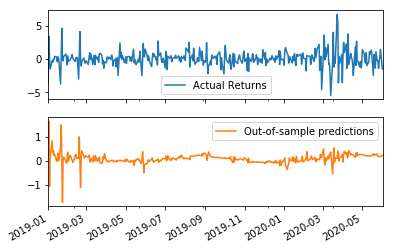

In [32]:
# Plot the results
Results_2019.plot(subplots=True)

In [33]:
# Out-of-sample metrics
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the dataframe above)
out_of_sample_mse = mean_squared_error(Results_2019["Actual Returns"],
                                       Results_2019["Out-of-sample predictions"])

print(f"MSE is {out_of_sample_mse}")

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
rolling_rmse = np.sqrt(out_of_sample_mse)

print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

MSE is 1.521640065544493
Rolling Out-of-Sample Root Mean Squared Error (RMSE): 1.2335477556805383


# Final Model Comparison

In [34]:
# Print out-of-sample RMSE and rolling out-of-sample RMSE
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Rolling Out-of-Sample Root Mean Squared Error (RMSE): {rolling_rmse}")

Out-of-sample Root Mean Squared Error (RMSE): 0.9612356236607867
Rolling Out-of-Sample Root Mean Squared Error (RMSE): 1.2335477556805383


Question: How does the RMSE for the two models compare?

Answer: The mse for out of sample is better than the rolling mse